In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
GENRES = [i for i in range(5)]

In [10]:
NUM_ARTICLES = 1000
article = [np.random.choice(GENRES, p = [0.5, 0.2, 0.1, 0.15, 0.05]) for _ in range(NUM_ARTICLES)]
article = pd.DataFrame(article, columns=["genre"])
article.to_csv("article.csv", index=False)

In [11]:
article.value_counts()

genre
0        497
1        189
3        146
2        110
4         58
Name: count, dtype: int64

In [12]:
user_choices = article.genre
reward_correct = 2
reward_incorrect = -1

In [13]:
class MaB():
    def __init__(self, n_arms, eps = 0.9, decay = 0.95):
        self.n_arms = n_arms
        self.rewards = np.zeros(n_arms)
        self.counts = np.zeros(n_arms)
        self.eps = eps
        self.decay = decay
        self.reward_history = []
        self.action_history = []
        self.cumulative_rewards = np.zeros(n_arms)

    def select(self):
        if np.random.rand() < self.eps:
            return np.random.randint(self.n_arms)
        else:
            return np.argmax(self.rewards / (self.counts + 1))
        
    def update(self, arm, reward):
        self.counts[arm] += 1
        self.rewards[arm] = self.rewards[arm] * self.decay + reward
        self.eps *= 0.99

        self.reward_history.append(reward)
        self.action_history.append(arm)
        self.cumulative_rewards[arm] += reward

    def output(self):
        arm = self.select()
        return arm
    
    def print_counts(self):
        return self.counts

In [14]:
n_arms = 5
mab = MaB(n_arms)

for i in range(100):
    out = mab.output()
    print(mab.rewards)
    print(mab.counts)
    if (out == user_choices[i]):
        reward = reward_correct
    else:
        reward = reward_incorrect
    mab.update(out, reward)
    print(out)

[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
2
[ 0.  0. -1.  0.  0.]
[0. 0. 1. 0. 0.]
0
[ 2.  0. -1.  0.  0.]
[1. 0. 1. 0. 0.]
4
[ 2.  0. -1.  0. -1.]
[1. 0. 1. 0. 1.]
0
[ 3.9  0.  -1.   0.  -1. ]
[2. 0. 1. 0. 1.]
0
[ 2.705  0.    -1.     0.    -1.   ]
[3. 0. 1. 0. 1.]
3
[ 2.705  0.    -1.    -1.    -1.   ]
[3. 0. 1. 1. 1.]
2
[ 2.705  0.    -1.95  -1.    -1.   ]
[3. 0. 2. 1. 1.]
0
[ 4.56975  0.      -1.95    -1.      -1.     ]
[4. 0. 2. 1. 1.]
2
[ 4.56975  0.      -2.8525  -1.      -1.     ]
[4. 0. 3. 1. 1.]
0
[ 6.3412625  0.        -2.8525    -1.        -1.       ]
[5. 0. 3. 1. 1.]
0
[ 5.02419937  0.         -2.8525     -1.         -1.        ]
[6. 0. 3. 1. 1.]
3
[ 5.02419937  0.         -2.8525     -1.95       -1.        ]
[6. 0. 3. 2. 1.]
0
[ 3.77298941  0.         -2.8525     -1.95       -1.        ]
[7. 0. 3. 2. 1.]
2
[ 3.77298941  0.         -3.709875   -1.95       -1.        ]
[7. 0. 4. 2. 1.]
0
[ 5.58433994  0.         -3.709875   -1.95       -1.        ]
[8. 0. 4. 2. 1.]
0
[ 7.30512294  

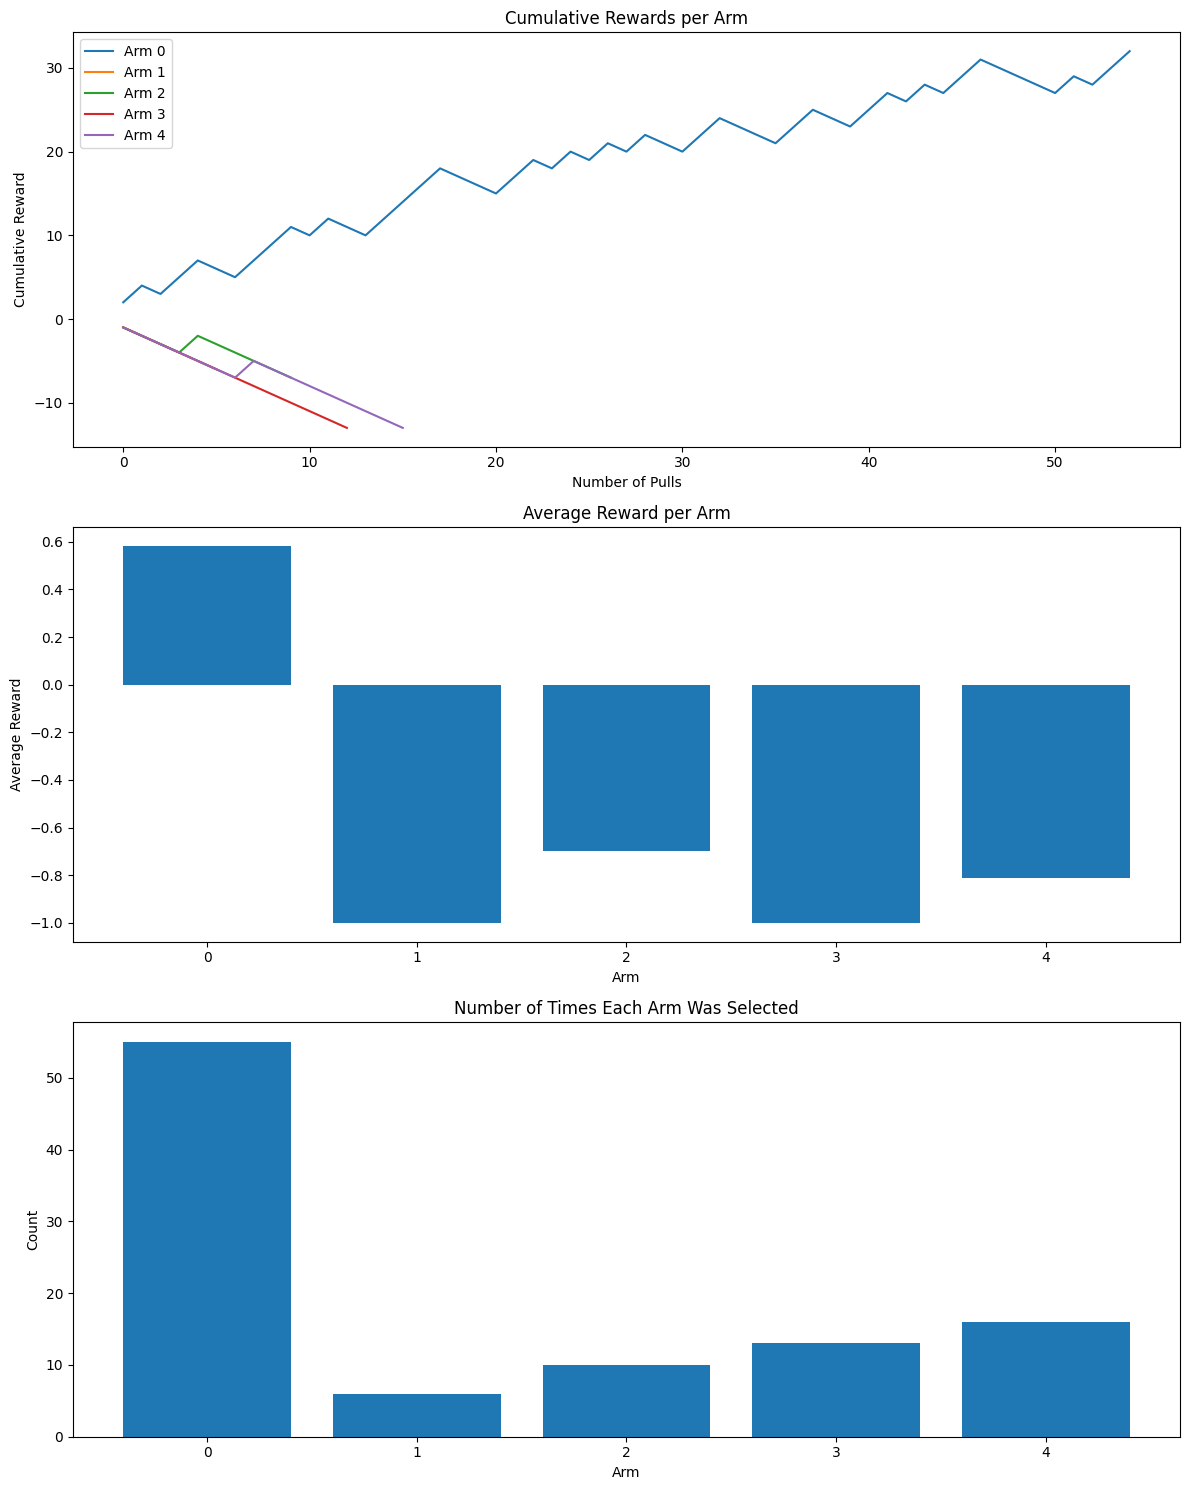

In [15]:
def plot_results(mab):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15))
    
    # Plot 1: Cumulative Rewards per Arm
    for arm in range(mab.n_arms):
        cumulative = np.array([r for i, r in enumerate(mab.reward_history) 
                             if mab.action_history[i] == arm]).cumsum()
        ax1.plot(cumulative, label=f'Arm {arm}')
    ax1.set_title('Cumulative Rewards per Arm')
    ax1.set_xlabel('Number of Pulls')
    ax1.set_ylabel('Cumulative Reward')
    ax1.legend()
    
    # Plot 2: Average Reward per Arm
    average_rewards = mab.cumulative_rewards / mab.counts
    ax2.bar(range(mab.n_arms), average_rewards)
    ax2.set_title('Average Reward per Arm')
    ax2.set_xlabel('Arm')
    ax2.set_ylabel('Average Reward')
    
    # Plot 3: Arm Selection Distribution
    ax3.bar(range(mab.n_arms), mab.counts)
    ax3.set_title('Number of Times Each Arm Was Selected')
    ax3.set_xlabel('Arm')
    ax3.set_ylabel('Count')
    
    plt.tight_layout()
    plt.show()

plot_results(mab)